In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read("/content/spam.csv")

AttributeError: module 'pandas' has no attribute 'read'

In [3]:
df = pd.read_csv("/content/spam.csv")

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 606-607: invalid continuation byte

In [4]:
df = pd.read_csv('/content/spam.csv')

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 606-607: invalid continuation byte

In [5]:
df = pd.read_csv('/content/spam.csv', encoding='latin-1')[['v1', 'v2']]


In [15]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.columns = ['label', 'message']


In [7]:
# Step 3: Convert Labels to Binary
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [8]:
# Step 4: Text Preprocessing and Vectorization
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['message'])
y = df['label']

In [9]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:

# Step 6: Model Training
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [11]:
# Step 7: Prediction & Evaluation
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.97847533632287

Confusion Matrix:
 [[952  13]
 [ 11 139]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.91      0.93      0.92       150

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115



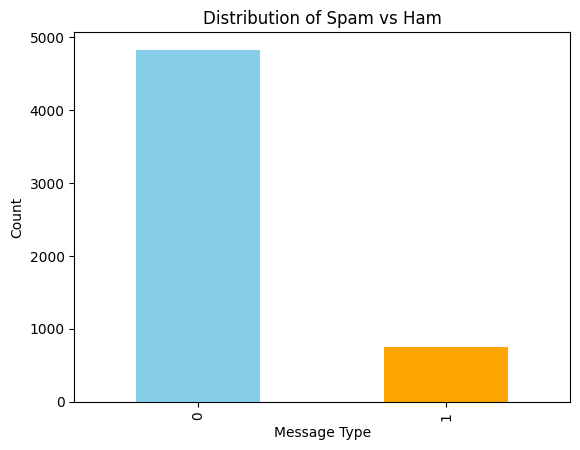

In [13]:
import matplotlib.pyplot as plt
df['label'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of Spam vs Ham')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()

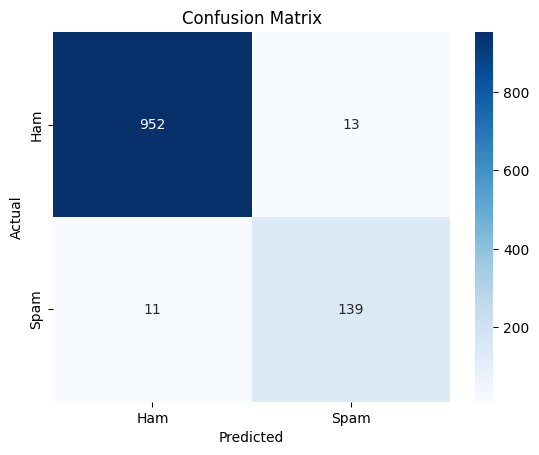

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<Axes: xlabel='label'>

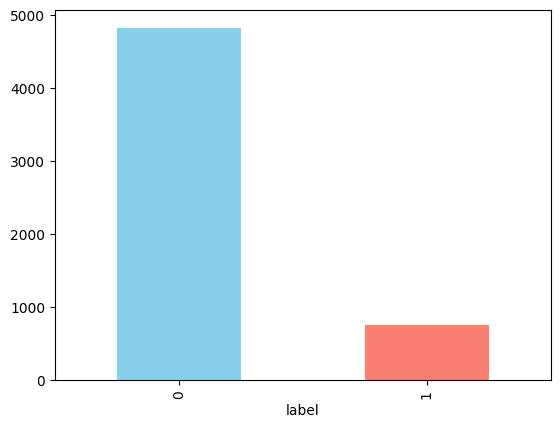

In [16]:
df['label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])

In [17]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues')

NameError: name 'predictions' is not defined

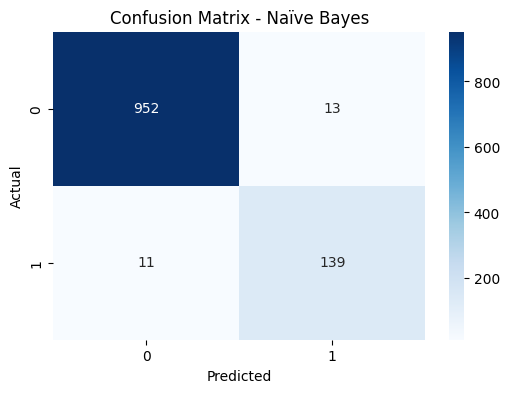

In [18]:
# Step: Predict the test set results
y_pred = model.predict(X_test)

# Then draw the confusion matrix heatmap
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naïve Bayes")
plt.show()
